In [79]:
import pandas as pd
import rasterio as rio
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

workspace_nbar = '/home/arthur/Dropbox/projects/rr_valley/MCD43A4/2020/h08v05/nbar/'
workspace_qa = '/home/arthur/Dropbox/projects/rr_valley/MCD43A4/2020/h08v05/qa/'

b1_path = workspace_nbar + 'MCD43A4.A2020183.h08v05.006.2020193061308_nbar_b1.tif'
b2_path = workspace_nbar + 'MCD43A4.A2020183.h08v05.006.2020193061308_nbar_b2.tif'
b1_qa_path = workspace_qa + 'MCD43A4.A2020183.h08v05.006.2020193061308_qa_b1.tif'
b2_qa_path = workspace_qa + 'MCD43A4.A2020183.h08v05.006.2020193061308_qa_b2.tif'



with rio.open(b1_path) as b1:
    b1_data = b1.read(1)

with rio.open(b2_path) as b2:
    b2_data = b2.read(1)
    
with rio.open(b1_qa_path) as b2_qa:
    b1_data_qa = b2_qa.read(1)
    
with rio.open(b1_qa_path) as b2_qa:
    b2_data_qa = b2_qa.read(1)

In [63]:
# qa screen

b1_data = b1_data.flatten()
b2_data = b2_data.flatten()
b1_data_qa = b1_data_qa.flatten()
b2_data_qa = b2_data_qa.flatten()
df = pd.DataFrame({'b1':b1_data, 'b2':b2_data, 'b1_qa':b1_data_qa, 'b2_qa':b2_data_qa})

mask_b1 = df[ df['b1_qa'] > 0].index
df.drop(mask_b1, inplace=True)

mask_b2 = df[ df['b2_qa'] > 0].index
df.drop(mask_b2, inplace=True)

df['b1'] = df['b1'] * 0.001
df['b2'] = df['b2'] * 0.001

(0.0, 1.0)

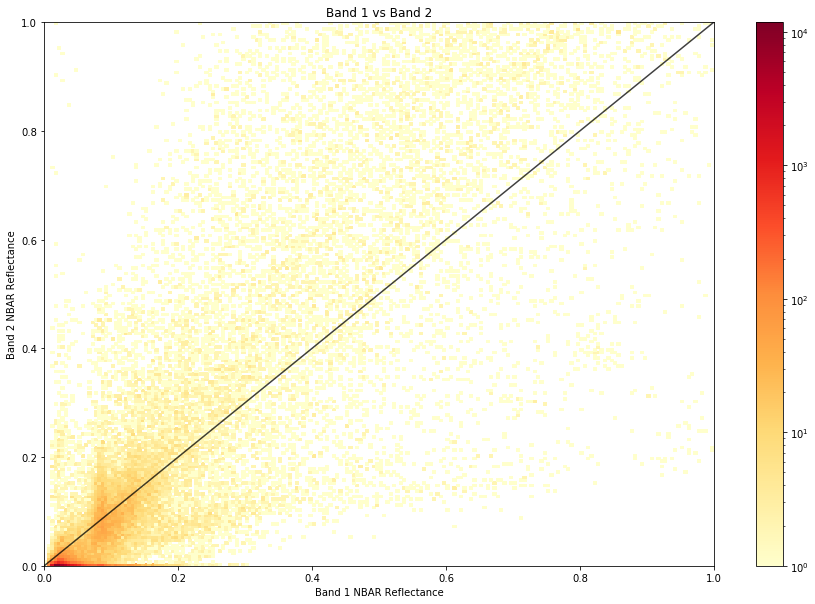

In [84]:
# plot

fig, ax = plt.subplots(figsize=(15,10))
fig.patch.set_facecolor('white')
#plt.figure(figsize=(10,10))

hist = plt.hist2d(df['b1'], df['b2'], bins=200, norm=LogNorm(),
                  range=[[0, 1.0], [0, 1.0]], cmap=plt.cm.YlOrRd)

fig = plt.colorbar(hist[3])

ax.set_ylim(0.0, 1.0)
ax.set_xlim(0.0, 1.0)
ax.set_xlabel('Band 1 NBAR Reflectance')
ax.set_ylabel('Band 2 NBAR Reflectance')
ax.set_title('Band 1 vs Band 2')

# 1:1 line
lims = [
    np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    np.max([plt.xlim(), plt.ylim()]),  # max of both axes
]
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=1)
plt.xlim(lims)
plt.ylim(lims)
